# ttest after excluding certain pairs of faces

In [4]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def load_results(results_fn, rep_name):
    results_dir = '../results/'
    results_path = os.path.join(results_dir,results_fn)
    
    with open(results_path, 'rb') as f:
        data = pickle.load(f)
    
    # Get regression results
    analysis = data['analysis']
    n_runs = len(analysis)
    n_steps = len(analysis[0])
    n_states = analysis[0][0]['get_diag_vis_params'][rep_name]['n_states']
    idx2loc = analysis[0][0]['get_diag_vis_params'][rep_name]['idx2loc']
    results_each = np.zeros([n_runs, n_steps, n_states])
    results_bl_tr = np.zeros([n_runs, n_steps])
    results_corners = np.zeros([n_runs, n_steps])
    for run_i, run in enumerate(analysis):
        for step_i, step in enumerate(run):
            # Results of regression excluding each face one at a time
            for idx in range(n_states):
                each = step['ttest_exclusion']['excluding_each'][rep_name][idx][0]
                results_each[run_i, step_i, idx] = each
            # Results of regression excluding bottom left and top right
            bl_tr = step['ttest_exclusion']['excluding_bl_tr'][rep_name][0]
            results_bl_tr[run_i, step_i] = bl_tr
            # Results of regression excluding all corners
            corners = step['ttest_exclusion']['excluding_corners'][rep_name][0]
            results_corners[run_i, step_i] = corners
    
    # Compute means and standard errors
    each_mean = np.mean(results_each, axis=0)
    each_sem = np.std(results_each, axis=0) / np.sqrt(n_runs)
    bl_tr_mean = np.mean(results_bl_tr, axis=0)
    bl_tr_sem = np.std(results_bl_tr, axis=0) / np.sqrt(n_runs)
    corners_mean = np.mean(results_corners, axis=0)
    corners_sem = np.std(results_corners, axis=0) / np.sqrt(n_runs)
    
    return (each_mean, each_sem), (bl_tr_mean, bl_tr_sem), (corners_mean, corners_sem), idx2loc

In [35]:
results_fn = 'rnn.P'
rep_name = 'average'
analyze_every = 50

results_dir = '../results/'
results_path = os.path.join(results_dir,results_fn)

with open(results_path, 'rb') as f:
    data = pickle.load(f)

In [21]:
# Get regression results
analysis = data['analysis']
n_runs = len(analysis)
n_steps = len(analysis[0])
n_states = analysis[0][0]['get_diag_vis_params'][rep_name]['n_states']
idx2loc = analysis[0][0]['get_diag_vis_params'][rep_name]['idx2loc']
results_each = np.zeros([n_runs, n_steps, n_states])
results_bl_tr = np.zeros([n_runs, n_steps])
results_corners = np.zeros([n_runs, n_steps])


In [30]:
for run_i, run in enumerate(analysis):
    for step_i, step in enumerate(run):
        # Results of regression excluding each face one at a time
        for idx in range(n_states):
            each = step['ttest_exclusion']['excluding_each'][rep_name][idx][0]
            results_each[run_i, step_i, idx] = each
        # Results of regression excluding bottom left and top right
        bl_tr = step['ttest_exclusion']['excluding_bl_tr'][rep_name][0]
        results_bl_tr[run_i, step_i] = bl_tr
        # Results of regression excluding all corners
        corners = step['ttest_exclusion']['excluding_corners'][rep_name][0]
        results_corners[run_i, step_i] = corners

# Compute means and standard errors
each_mean = np.mean(results_each, axis=0)
each_sem = np.std(results_each, axis=0) / np.sqrt(n_runs)
bl_tr_mean = np.mean(results_bl_tr, axis=0)
bl_tr_sem = np.std(results_bl_tr, axis=0) / np.sqrt(n_runs)
corners_mean = np.mean(results_corners, axis=0)
corners_sem = np.std(results_corners, axis=0) / np.sqrt(n_runs)

# return (each_mean, each_sem), (bl_tr_mean, bl_tr_sem), (corners_mean, corners_sem), idx2loc

In [56]:
run = analysis[0]
step = run[-1]
# step['ttest_exclusion']['excluding_each'][rep_name]

In [57]:
len(analysis)

20

In [58]:
len(run)

21

In [59]:
step['ttest_exclusion']['excluding_each'][rep_name]

[[2.784995657038594, 0.007120672969815462],
 [4.264133649270589, 7.08895390116282e-05],
 [4.185337511276191, 9.28936034161022e-05],
 [4.036211494154661, 0.00015393979428927765],
 [4.568716103348338, 2.4419862196024243e-05],
 [4.13417624270317, 0.00011057796910321239],
 [4.109082870541423, 0.00012040063595472071],
 [3.8522465355278688, 0.0002835176116364166],
 [4.400940635576785, 4.409718211413525e-05],
 [4.197906295037707, 8.89869807202331e-05],
 [4.001725294250555, 0.00017279639303436096],
 [3.861195929738119, 0.0002753092390470686],
 [4.509846816709797, 3.007917245434106e-05],
 [4.294573633176818, 6.382055675182754e-05],
 [4.517422277208945, 2.9284966803675623e-05],
 [3.2399879409540957, 0.0019372011784569564]]

In [50]:
each = step['ttest_exclusion']['excluding_each'][rep_name][0]
each

[2.746797345481442, 0.007899933597861702]

In [31]:
def plot_each(each_mean, each_sem, idx2loc, title, save_fn):
    n_steps = len(each_mean)
    x = [i for i in range(n_steps)]
    x_labels = [i*analyze_every for i in range(n_steps)]
    xticks = [4*i for i in range((n_steps // 4) + 1)]
    xtick_labels = [xtick*analyze_every for xtick in xticks]
    
    fig, ax = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(15, 10))
    for idx, loc in idx2loc.items():
        fig_loc = (3 - loc[1], loc[0])
        ax[fig_loc].errorbar(x, each_mean[:,idx], yerr=each_sem[:,idx])
        ax[fig_loc].set_xticks(xticks)
        ax[fig_loc].axhline(y=1.96, color='r', linewidth=2)
        ax[fig_loc].axhline(y=-1.96, color='r', linewidth=2)
        ax[fig_loc].set_title("Excluding (%d, %d)" % loc)
        if fig_loc[0] == 3:
            ax[fig_loc].set_xticklabels(xtick_labels)
            ax[fig_loc].set_xlabel("Steps")
        if fig_loc[1] == 0:
            ax[fig_loc].set_ylabel("T statistic")
        
    fig.suptitle(title, y=0.94)
    
    # Save figure
    if save_fn is not None:
        plt.savefig(save_fn, dpi=300, bbox_inches='tight')
    plt.show()   

In [46]:
def plot_ttest(t_mean, t_sem, title, save_fn):
    n_steps = len(t_mean)
    x = [i for i in range(n_steps)]
    x_labels = [i*analyze_every for i in range(n_steps)]
    xticks = [2*i for i in range((n_steps // 2) + 1)]
    xtick_labels = [xtick*analyze_every for xtick in xticks]
    
    fig, ax = plt.subplots()
    ax.errorbar(x, t_mean, yerr=t_sem)
    ax.axhline(y=1.96, color='r', linewidth=2)
    ax.axhline(y=-1.96, color='r', linewidth=2)
        
    ax.set_title(title)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xtick_labels)
    ax.set_xlabel("Steps")
    ax.set_ylabel("T statistic")
    
    # Save figure
    if save_fn is not None:
        plt.savefig(save_fn, dpi=300, format='eps', bbox_inches='tight')
    plt.show()    

## MLP

In [5]:
# results_fn = 'mlp.P'
# rep_name = 'hidden'
# analyze_every = 50

In [6]:
# each, bl_tr, corners, idx2loc = load_results(results_fn, rep_name)
# each_mean, each_sem = each
# bl_tr_mean, bl_tr_sem = bl_tr 
# corners_mean, corners_sem = corners

In [7]:
# title = "MLP: regression excluding each face"
# save_fn = '../../figures/mlp_excluding_each.eps'

In [11]:
# plot_each(each_mean, each_sem, idx2loc, title, save_fn)

In [12]:
# title = "MLP: regression excluding bottom left and top right"
# save_fn = '../../figures/mlp_excluding_bl_tr.eps'

In [13]:
# plot_regression(bl_tr_mean, bl_tr_sem, title, save_fn)

In [14]:
# title = "MLP: regression excluding all corners"
# save_fn = '../../figures/mlp_excluding_corners.eps'

In [15]:
# plot_regression(corners_mean, corners_sem, title, save_fn)

## RNN

In [36]:
results_fn = 'rnn.P'
rep_name = 'average'
analyze_every = 50

In [37]:
each, bl_tr, corners, idx2loc = load_results(results_fn, rep_name)
each_mean, each_sem = each
bl_tr_mean, bl_tr_sem = bl_tr 
corners_mean, corners_sem = corners

In [42]:
title = "RNN: regression excluding each face"
save_fn = '../figures/rnn_excluding_each.eps'

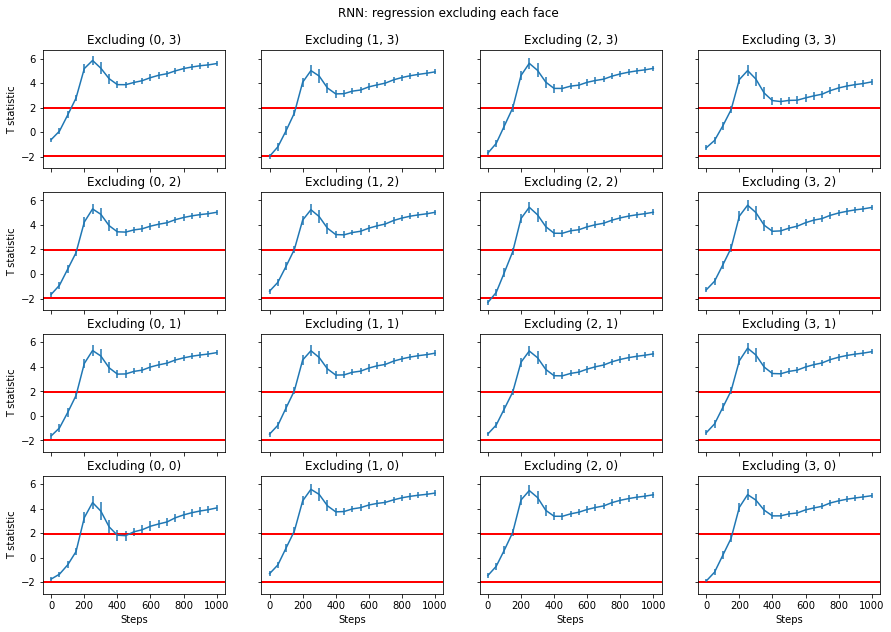

In [43]:
plot_each(each_mean, each_sem, idx2loc, title, save_fn)

In [54]:
title = "RNN: ttest excluding bottom left and top right"
save_fn = '../figures/rnn_excluding_bl_tr.eps'

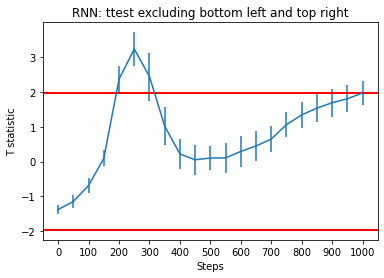

In [55]:
plot_ttest(bl_tr_mean, bl_tr_sem, title, save_fn)

In [48]:
title = "RNN: regression excluding all corners"
save_fn = '../figures/rnn_excluding_corners.eps'

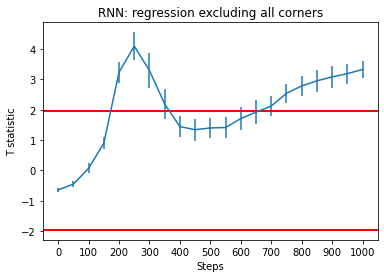

In [49]:
plot_ttest(corners_mean, corners_sem, title, save_fn)